In [12]:
import sys
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Add the project root directory to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.training import data_split_augment, train_model
from src.model import build_model

In [13]:
train_ds, val_ds = data_split_augment("../data/raw", (224,224), 16)

Found 360 files belonging to 9 classes.
Using 288 files for training.
Found 360 files belonging to 9 classes.
Using 72 files for validation.


In [14]:
model = build_model((224, 224), 9)

In [15]:
model.summary

<bound method Model.summary of <Sequential name=sequential_3, built=True>>

In [16]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30  
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.0878 - loss: 2.2455 - val_accuracy: 0.1944 - val_loss: 2.0767
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.1817 - loss: 2.0464 - val_accuracy: 0.2222 - val_loss: 2.0327
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.3204 - loss: 1.8843 - val_accuracy: 0.3611 - val_loss: 1.7955
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.4171 - loss: 1.5014 - val_accuracy: 0.3472 - val_loss: 1.7395
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.4787 - loss: 1.3901 - val_accuracy: 0.5139 - val_loss: 1.6061
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.5313 - loss: 1.2668 - val_accuracy: 0.5139 - val_loss: 1.4970
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - accuracy: 0.4696 - loss: 1.4773 - val_accuracy: 0.5000 - val_loss: 1.4742
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.5376 - loss: 1.1835 - val_accuracy: 0.

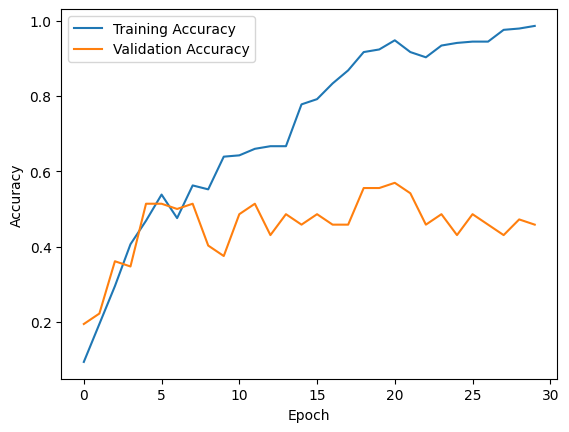

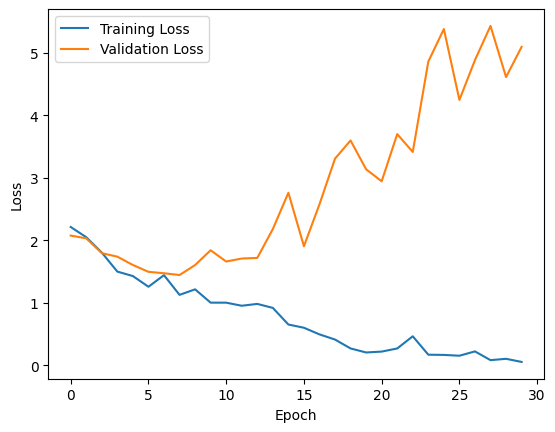

In [17]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model_regularization = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(.3),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(9, activation='softmax')  # 9 output classes for fruit categories
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model_regularization.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [19]:
history_reg = model_regularization.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30  
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 405ms/step - accuracy: 0.1181 - loss: 12.0417 - val_accuracy: 0.0417 - val_loss: 2.1892
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.1596 - loss: 2.1694 - val_accuracy: 0.1806 - val_loss: 2.1528
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 393ms/step - accuracy: 0.1087 - loss: 2.0715 - val_accuracy: 0.2361 - val_loss: 2.0066
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step - accuracy: 0.2211 - loss: 1.9549 - val_accuracy: 0.3333 - val_loss: 1.9106
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.3159 - loss: 1.8282 - val_accuracy: 0.3194 - val_loss: 1.8830
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 391ms/step - accuracy: 0.3832 - loss: 1.6265 - val_accuracy: 0.3333 - val_loss: 1.8513
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 378ms/step - accuracy: 0.5032 - loss: 1.3719 - val_accuracy: 0.3472 - val_loss: 1.8794
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.5917 - loss: 1.2317 - val_accuracy: 0

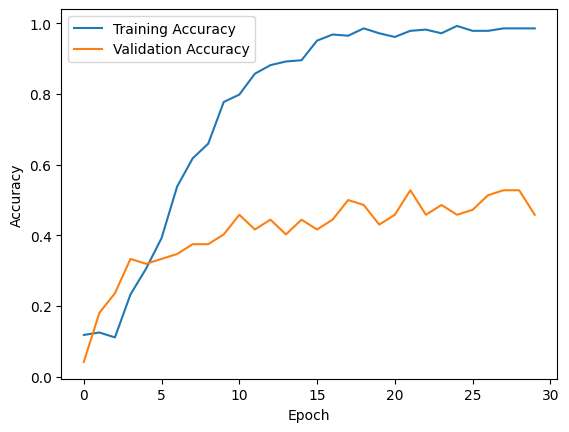

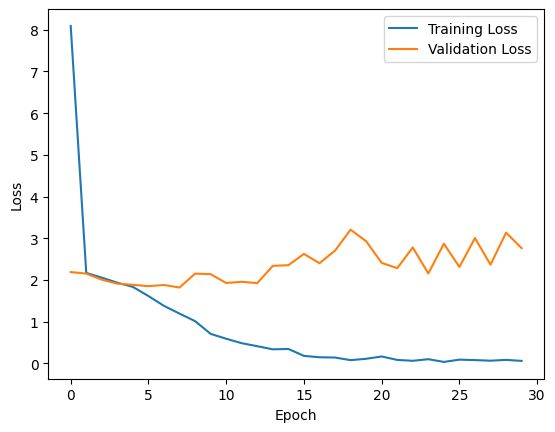

In [20]:
plt.plot(history_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_reg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

In [28]:
# Load the MobileNetV2 model with pretrained weights
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model to retain learned features

# Add custom layers on top
pre_trained_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),          # Pooling layer to reduce the feature maps
    Dense(128, activation='relu'),     # Custom dense layer
    Dropout(0.5),                      # Dropout layer to prevent overfitting
    Dense(9, activation='softmax')  # Output layer with softmax for classification
])

pre_trained_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [29]:
history_preTrained = pre_trained_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.1114 - loss: 2.6367 - val_accuracy: 0.2222 - val_loss: 2.1171
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - accuracy: 0.2733 - loss: 2.0531 - val_accuracy: 0.3611 - val_loss: 1.8757
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.4156 - loss: 1.7454 - val_accuracy: 0.4444 - val_loss: 1.6629
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.4989 - loss: 1.5148 - val_accuracy: 0.5556 - val_loss: 1.4726
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.6380 - loss: 1.2459 - val_accuracy: 0.6250 - val_loss: 1.3265
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.6778 - loss: 1.1354 - val_accuracy: 0.6806 - val_loss: 1.2051
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.6696 - loss: 1.0454 - val_accuracy: 0.6944 - val_loss: 1.1070
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - accuracy: 0.7771 - loss: 0.8734 - val_accuracy: 0.

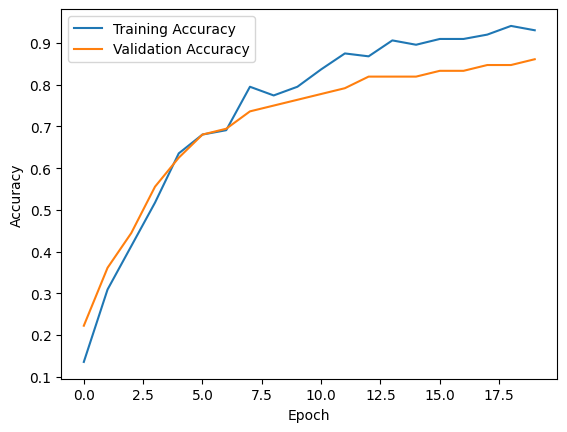

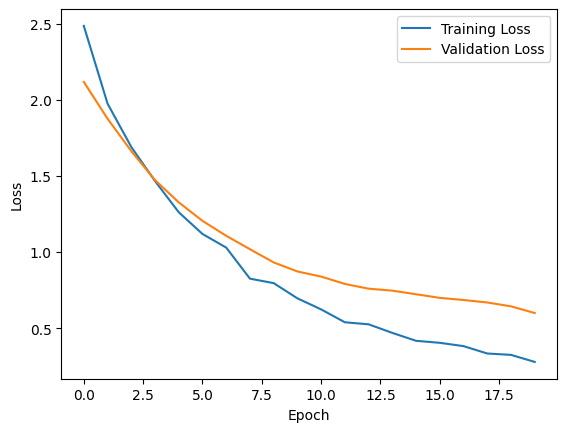

In [30]:
plt.plot(history_preTrained.history['accuracy'], label='Training Accuracy')
plt.plot(history_preTrained.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_preTrained.history['loss'], label='Training Loss')
plt.plot(history_preTrained.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
import numpy as np
from PIL import Image

In [33]:
def load_and_preprocess_image(image_path, img_size=(224, 224)):
    """
    Loads and preprocesses an image to match the model's expected input format.
    """
    img = Image.open(image_path).convert("RGB")  # Ensure RGB format
    img = img.resize(img_size)  # Resize to model's input size
    img_array = np.array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess for MobileNetV2
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

def predict_on_directory(model, directory, img_size=(224, 224)):
    """
    Loads images from a directory, preprocesses them, and makes predictions using the model.
    """
    plt.figure(figsize=(15, 15))
    images = [f for f in os.listdir(directory) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    for i, image_file in enumerate(images[:9]):  # Limit to 9 images for display purposes
        image_path = os.path.join(directory, image_file)
        preprocessed_image = load_and_preprocess_image(image_path, img_size)
        
        # Make predictions
        predictions = model.predict(preprocessed_image)
        predicted_class = np.argmax(predictions)
        confidence = np.max(predictions)  # Get the confidence score for the predicted class

        # Display the image with its predicted label and confidence
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Class {predicted_class}, Confidence: {confidence:.2f}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


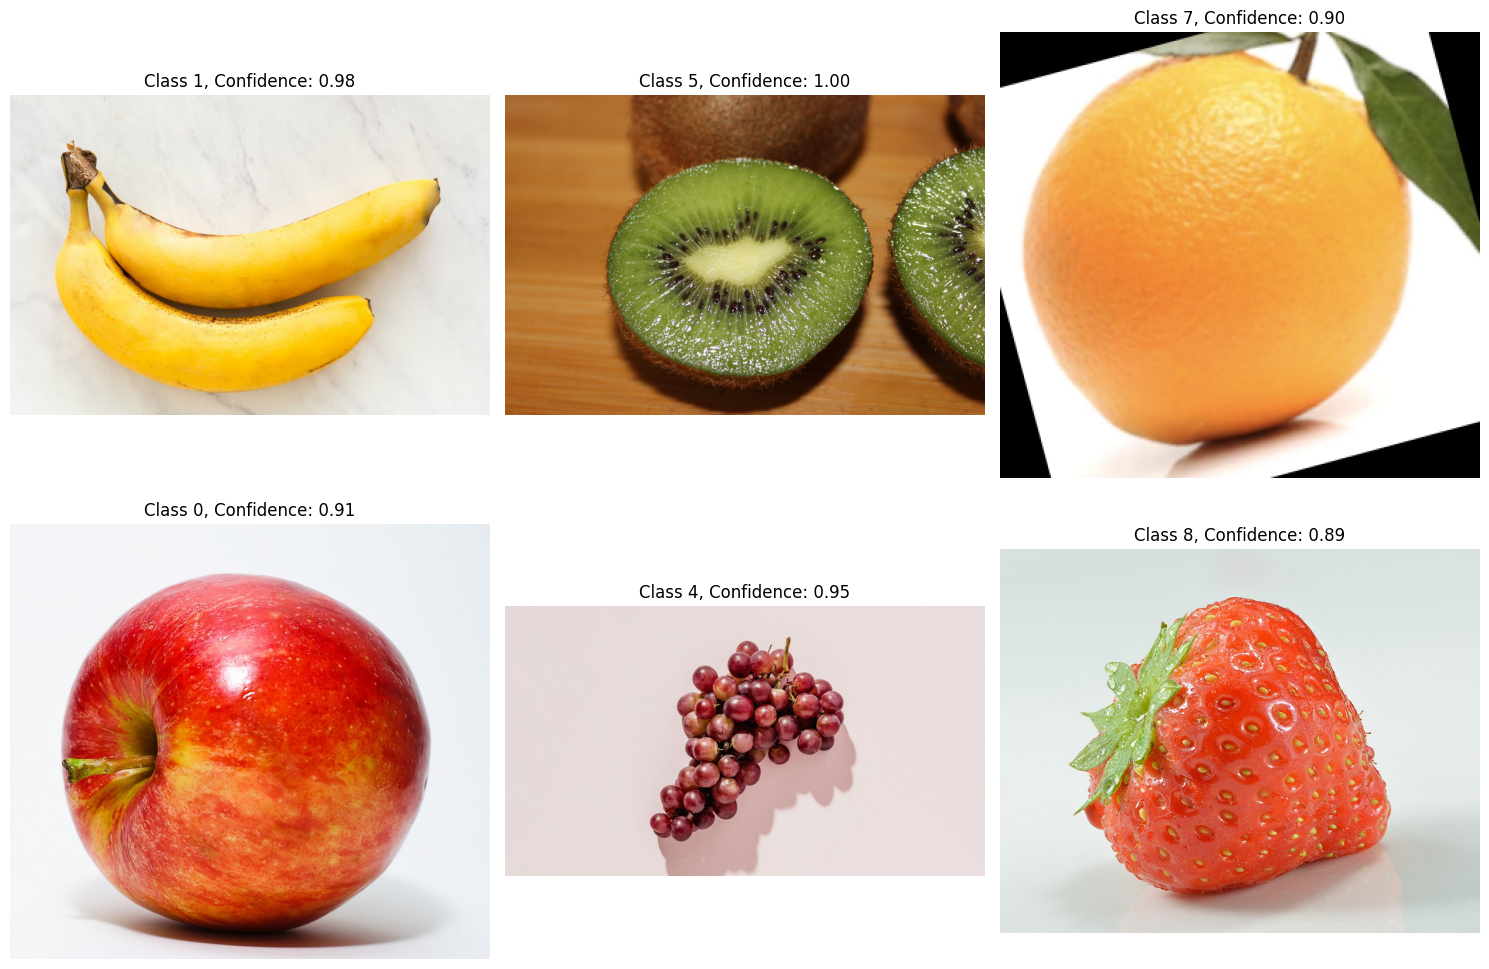

In [35]:
test_directory = '../data/test/'  # Replace with the path to your test images directory
predict_on_directory(pre_trained_model, test_directory)

In [36]:
def load_and_preprocess_image(image_path, img_size=(224, 224)):
    """
    Loads and preprocesses an image to match the model's expected input format.
    """
    img = Image.open(image_path).convert("RGB")  # Ensure RGB format
    img = img.resize(img_size)  # Resize to model's input size
    img_array = np.array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess for MobileNetV2
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

def predict_on_directory(model, class_names, directory, img_size=(224, 224)):
    """
    Loads images from a directory, preprocesses them, and makes predictions using the model.
    """
    plt.figure(figsize=(15, 15))
    images = [f for f in os.listdir(directory) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    for i, image_file in enumerate(images[:9]):  # Limit to 9 images for display purposes
        image_path = os.path.join(directory, image_file)
        preprocessed_image = load_and_preprocess_image(image_path, img_size)
        
        # Make predictions
        predictions = model.predict(preprocessed_image)
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]  # Map index to class name
        confidence = np.max(predictions)  # Get the confidence score for the predicted class

        # Display the image with its predicted label and confidence
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{predicted_class}, Confidence: {confidence:.2f}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

In [38]:
# Get the class names from the subdirectory names
class_names = sorted([entry.name for entry in os.scandir("../data/raw") if entry.is_dir()])
print("Class names:", class_names)

Class names: ['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


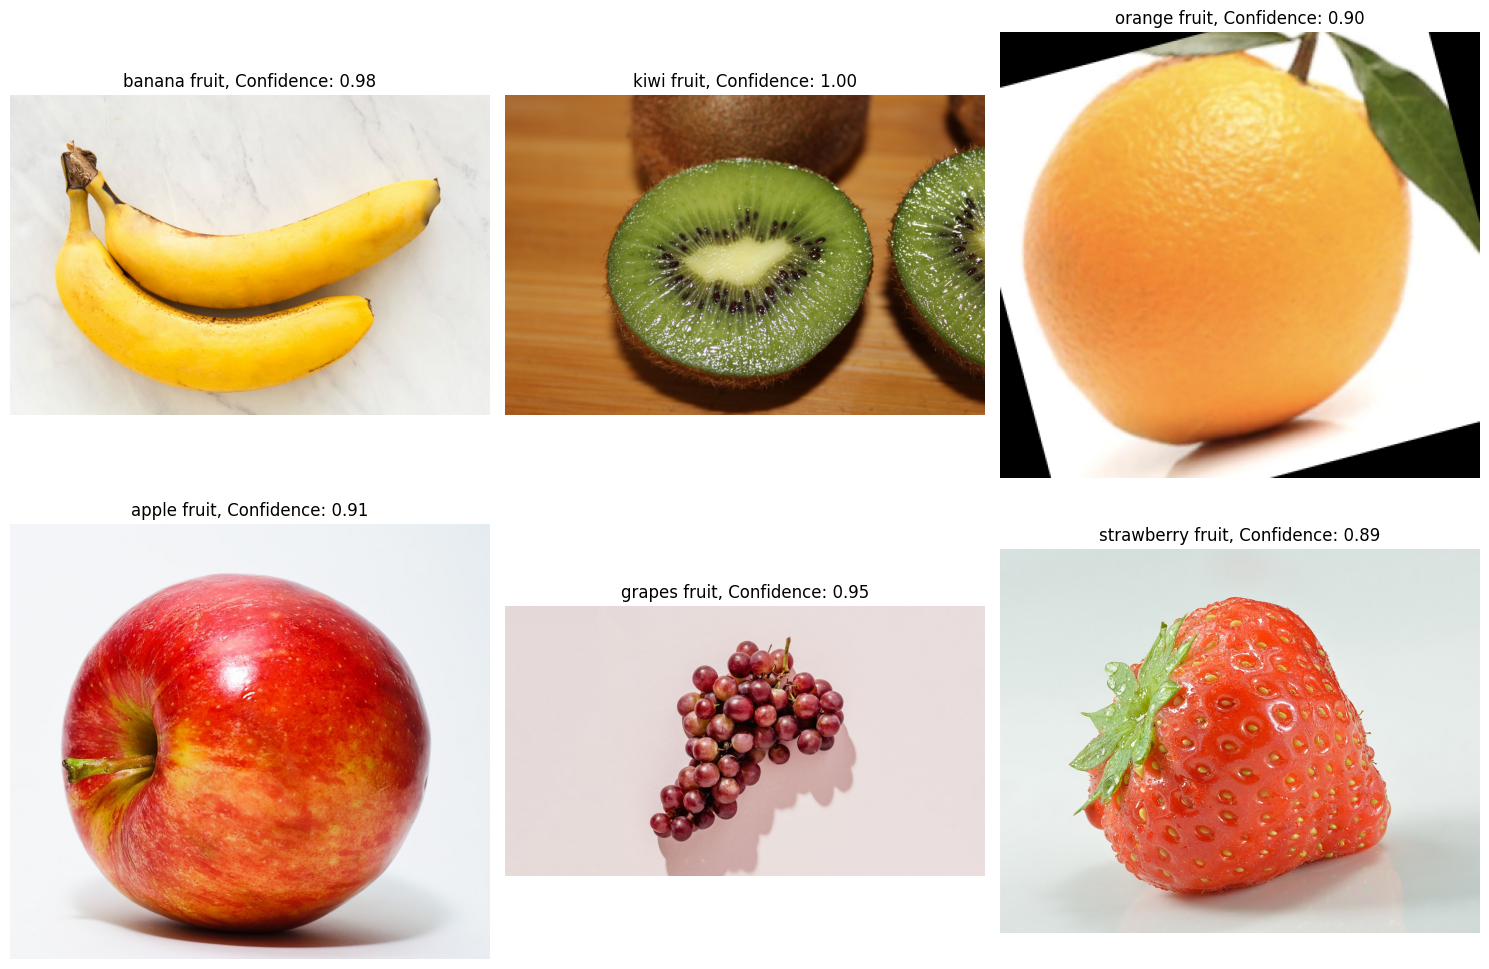

In [39]:
test_directory = '../data/test'    # Replace with the path to your test images directory

predict_on_directory(pre_trained_model, class_names, test_directory)
